# Polygon Animation

In [2]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl

# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

The magic function above allows us to use matplotlib in Jupyter notebook, interact with graphs, and create animations with a live kernel. Other basic imports have been made for function implementations.

## Plan of action

Before we begin, we need to know what exactly we want to animate, and what kind of variables and functions we will require for animation purposes.

* We want to create an animation of a triangle morphing into an octagon, passing through all regular polygons in between. Then, the animation will pause for a moment and retrace its path.

* By plotting points on the x-y plane and iteratively moving their locations, we can create such an animation.

* Thus we will require a polygon generating function and a morphing function. This can be done in a couple of ways, as shall be shown below.

* Later, on we will see what else we need to do to implement the final animation.

### Method 1


In [3]:
def npoly(n, r, npoints, offset_angle=0):
    x = []
    y = []
    pps = int(npoints/n)
    for i in range(n):
        for j in range(0,pps):
            l = (r*np.cos(np.pi/n))/(np.cos((np.pi/n) - (2*j*np.pi/(n*pps))))
            x.append(l*np.cos(offset_angle + (2*i*np.pi/n) + (2*j*np.pi/(n*pps))))
            y.append(l*np.sin(offset_angle + (2*i*np.pi/n) + (2*j*np.pi/(n*pps))))
    x = np.array(x)
    y = np.array(y)
    return x,y                 

This is a general utility function that generates the x and y coordinate arrays for a regular n-sided polygon. This has been done by mapping the vertices of the polygon to points on a circle separated by equal angles. It takes:

* 'n', the number of sides
* 'r', the radius of the base circle
* 'npoints', the number of points
* and 'offset_angle', the degree by which the figure is rotated anticlockwise by initially

as inputs.

The step-by-step algorithm used is as follows:

* First, divide the number of points given by the number of sides and store this in a variable, 'pps'. __It must be ensured that the number of points supplied is a common multiple of all the sides required, else we will run into round-off issues__.
* We will start iterating over the sides of the polygon. For each side, divide the angle subtended by it at the centre of the circle into a number of smaller angles. These will act as the angles between each subsequent point for a given side.
* Using some basic trigonometry and properties of triangles, we can find the length of the line segment connecting a point and the centre and use the total angle (= offset angle + angle subtended by sides before it + angle subtended by its current position with respect to the vertices of the side) to find the respective coordinates.
* In case we encounter the last side, we add an extra point to close off the figure.

In [4]:
def morph(x1, y1, x2, y2, alpha):
    xm = (1-alpha) * x1 + (alpha) * x2
    ym = (1-alpha) * y1 + (alpha) * y2
    return xm, ym

# Initializing figures

npoints = 840
radius = 1
x1,y1 = npoly(3, radius, npoints)
x2,y2 = npoly(4, radius, npoints)
x3,y3 = npoly(5, radius, npoints)
x4,y4 = npoly(6, radius, npoints)
x5,y5 = npoly(7, radius, npoints)
x6,y6 = npoly(8, radius, npoints)


To obtain the frames for the animation, we must create intermediate shapes during the transitions. To do this, we use simple linear interpolation in the form of the __morph__ function. We have also initialized the arrays for our shapes.

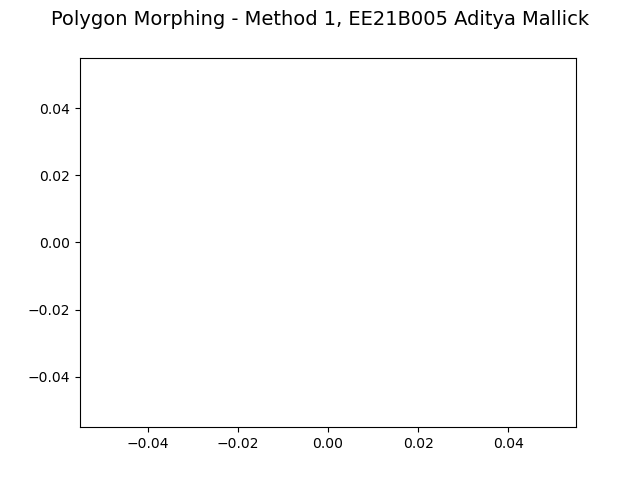

In [5]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

framenum = 1000

def init(): 
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    frame /= framenum/10000
    if (frame < 9):
        xdata, ydata = morph(x1, y1, x2, y2, frame/9)
        ln.set_data(xdata, ydata)
    elif (frame < 18):
        xdata, ydata = morph(x2, y2, x3, y3, (frame-9)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 27):
        xdata, ydata = morph(x3, y3, x4, y4, (frame-18)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 36):
        xdata, ydata = morph(x4, y4, x5, y5, (frame-27)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 45):
        xdata, ydata = morph(x5, y5, x6, y6, (frame-36)/9)
        ln.set_data(xdata, ydata)
    elif (frame < 55):
        pass
    elif (frame < 64):
        xdata, ydata = morph(x6, y6, x5, y5, (frame-55)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 73):
        xdata, ydata = morph(x5, y5, x4, y4, (frame-64)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 82):
        xdata, ydata = morph(x4, y4, x3, y3, (frame-73)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 91):
        xdata, ydata = morph(x3, y3, x2, y2, (frame-82)/9)
        ln.set_data(xdata, ydata)
    elif (frame <= 100):
        xdata, ydata = morph(x2, y2, x1, y1, (frame-91)/9)
        ln.set_data(xdata, ydata)


fig.suptitle('Polygon Morphing - Method 1, EE21B005 Aditya Mallick', fontsize=14)
ani = FuncAnimation(fig, update, frames=np.linspace(0, framenum/100, framenum + 1), init_func=init, blit=False, interval=(10000/framenum), repeat=False)
plt.show()


To create the animation, we take the help of the __FuncAnimation__ function. Some of the important parameters it takes are:

* __fig:__ The figure that is to be used for plotting.
* __update:__ This is the main function used to update the figure at each frame. For our purpose, I have defined it such that each transition takes an equal amount of time. We start from the 3-sided triangle all the way up to the 8-sided octagon, pause for a moment, and return by the same path. At each iteration, the update function calls morph to get the intermediate shape and replot the figure.
* __frames:__ This is an array that we iterate over for each frame. Its value is passed to the update function. We have implemented np.linspace to create an array of equally spaced numbers.
* __init func:__ The function that is used to initialize the plot.
* __interval:__ The time interval in milliseconds between each frame.

For the above animation, we have chosen 1280 frames and all the parameters have been adjusted accordingly.

Upon analysing the above animation, we notice that he lines seem to be curving during the transitions between the polygons having a smaller number of sides. To rectify this, we must change the way in which we define our shape matrices.

### Method 2

In [16]:
def linpoly(n, r, npoints, offset_angle=0):
    x = []
    y = []
    pps = int(npoints/n)
    for i in range(n):
        x.extend(np.linspace(np.cos(offset_angle + (2*i*np.pi/n)),np.cos(offset_angle + (2*(i+1)*np.pi/n)),pps))
        y.extend(np.linspace(np.sin(offset_angle + (2*i*np.pi/n)),np.sin(offset_angle + (2*(i+1)*np.pi/n)),pps))
    x = np.array(x)
    y = np.array(y)
    return x,y   

Here we have followed a similar approach, but instead of going by pure trigonometry and geometry, we have decided to opt for something simpler.

We iterate over each side of the polygon and create arrays of equally spaced x and y coordinates between the vertices of the side, using np.linspace.

In [17]:
# Initializing figures

npoints = 840
radius = 1
x1,y1 = linpoly(3, radius, npoints)
x2,y2 = linpoly(4, radius, npoints)
x3,y3 = linpoly(5, radius, npoints)
x4,y4 = linpoly(6, radius, npoints)
x5,y5 = linpoly(7, radius, npoints)
x6,y6 = linpoly(8, radius, npoints)


ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x10faf8220>>
Traceback (most recent call last):
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1138, in _draw_next_frame
    self._draw_frame(framedata)
  File "/Users/adityamallick/anaconda3/lib/

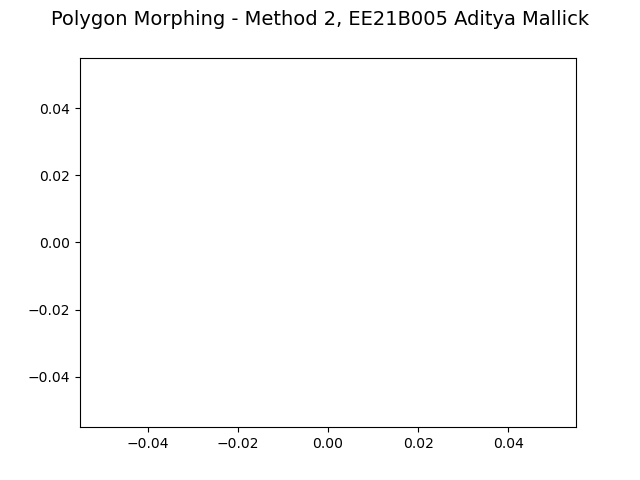

In [18]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

framenum = 1000

def init(): 
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    frame /= framenum/10000
    if (frame < 9):
        xdata, ydata = morph(x1, y1, x2, y2, frame/9)
        ln.set_data(xdata, ydata)
    elif (frame < 18):
        xdata, ydata = morph(x2, y2, x3, y3, (frame-9)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 27):
        xdata, ydata = morph(x3, y3, x4, y4, (frame-18)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 36):
        xdata, ydata = morph(x4, y4, x5, y5, (frame-27)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 45):
        xdata, ydata = morph(x5, y5, x6, y6, (frame-36)/9)
        ln.set_data(xdata, ydata)
    elif (frame < 55):
        pass
    elif (frame < 64):
        xdata, ydata = morph(x6, y6, x5, y5, (frame-55)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 73):
        xdata, ydata = morph(x5, y5, x4, y4, (frame-64)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 82):
        xdata, ydata = morph(x4, y4, x3, y3, (frame-73)/9)
        ln.set_data(xdata, ydata)        
    elif (frame < 91):
        xdata, ydata = morph(x3, y3, x2, y2, (frame-82)/9)
        ln.set_data(xdata, ydata)
    elif (frame <= 100):
        xdata, ydata = morph(x2, y2, x1, y1, (frame-91)/9)
        ln.set_data(xdata, ydata)


fig.suptitle('Polygon Morphing - Method 2, EE21B005 Aditya Mallick', fontsize=14)
ani = FuncAnimation(fig, update, frames=np.linspace(0, framenum/100, framenum + 1), init_func=init, blit=False, interval=(10000/framenum), repeat=False)
plt.show()


Using the same animation procedure as before, we get the above output.

We have successfully rectified the error that we had and now the points are moving in straight line paths. However, something still doesn't look right. On analysing the sample animation that we were given, we notice that the points seem to be splitting up, transitioning, and then merging together to form the final figure.

To implement this, we must change our entire approach.

In [19]:
def cornerpoly(n, r, offset_angle=0):
    x = []
    y = []
    for i in range(n):
        x.append(np.cos(offset_angle + (2*i*np.pi/n)))
        y.append(np.sin(offset_angle + (2*i*np.pi/n)))
    x = np.array(x)
    y = np.array(y)
    return x,y  

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x10fcb9720>>
Traceback (most recent call last):
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1138, in _draw_next_frame
    self._draw_frame(framedata)
  File "/Users/adityamallick/anaconda3/lib/

This time, we are going to utilize the fact that we actually don't need to plot so many points. This is because __matplotlib automatically joins the plotted points with lines, and since we are dealing with regular polygons, we just have to plot the vertices!__

Thus, that is what we have done here.

In [20]:
def splitmorph(x1, y1, x2, y2, alpha): 
    
    if (len(x1) > len(x2)):
        x2,x1 = x1,x2
        y2,y1 = y1,y2
        alpha = 1 - alpha

    x1 = np.concatenate((x1, x1[0]), axis=None)
    y1 = np.concatenate((y1, y1[0]), axis=None)
    x1 = np.repeat(x1, 2)
    y1 = np.repeat(y1, 2)
    x2 = np.append(np.insert(np.repeat(x2[1:], 2), 0, x2[0]), x2[0])
    y2 = np.append(np.insert(np.repeat(y2[1:], 2), 0, y2[0]), y2[0])

    
    xm = (1-alpha) * x1 + (alpha) * x2
    ym = (1-alpha) * y1 + (alpha) * y2
    return xm, ym 

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x10fcb9720>>
Traceback (most recent call last):
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1138, in _draw_next_frame
    self._draw_frame(framedata)
  File "/Users/adityamallick/anaconda3/lib/

Now, this is the important step. Since we have matrices of different sizes now (depending on the number of vertices), we must do some transformations to ensure smooth transitioning. The procedure is as follows:

* Find the figure having lesser number of sides -> let it have 'n' points.
* Close off this figure by adding the first point in its matrix. smaller figure matrix -> 'n+1 points'.
* To obtain the 'splitting' effect we will duplicate the points of this figure. smaller figure matrix -> '2n+2 points'
* Also duplicate the points of the figure having larger number of sides (apart from the starting point) and close it off. larger figure matrix -> '1 + 2*(n + 1 - 1) + 1 = 2n+2 points'
* Now they are of the same size, so we will apply linear interpolation.

The mapping is done in such that each pair (initial + duplicate) of points of the initial figure travel towards the closest possible distinct vertices of the final figure. Thus, every vertex in the final figure will be the final result of two points merging towards it. Any intermediate stage will have '2n+2' sides, and finally when the points merge we will end up with 'n+1' sides.

In [21]:
# Initializing figures
radius = 1
x1,y1 = cornerpoly(3, radius)
x2,y2 = cornerpoly(4, radius)
x3,y3 = cornerpoly(5, radius)
x4,y4 = cornerpoly(6, radius)
x5,y5 = cornerpoly(7, radius)
x6,y6 = cornerpoly(8, radius)

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x10fcb9720>>
Traceback (most recent call last):
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/Users/adityamallick/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py", line 1138, in _draw_next_frame
    self._draw_frame(framedata)
  File "/Users/adityamallick/anaconda3/lib/

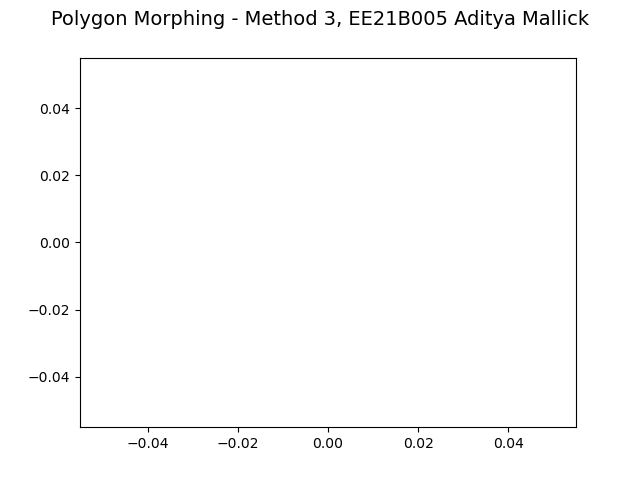

In [23]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')


framenum = 1000

def init(): 
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    frame /= framenum/10000
    if (frame < 12):
        xdata, ydata = splitmorph(x1, y1, x2, y2, frame/12)
        ln.set_data(xdata, ydata)
    elif (frame < 20):
        xdata, ydata = splitmorph(x2, y2, x3, y3, (frame-12)/8)
        ln.set_data(xdata, ydata)        
    elif (frame < 27):
        xdata, ydata = splitmorph(x3, y3, x4, y4, (frame-20)/7)
        ln.set_data(xdata, ydata)        
    elif (frame < 35):
        xdata, ydata = splitmorph(x4, y4, x5, y5, (frame-27)/8)
        ln.set_data(xdata, ydata)        
    elif (frame < 46):
        xdata, ydata = splitmorph(x5, y5, x6, y6, (frame-35)/11)
        ln.set_data(xdata, ydata)
    elif (frame < 55):
        pass
    elif (frame < 66):
        xdata, ydata = splitmorph(x6, y6, x5, y5, (frame-55)/11)
        ln.set_data(xdata, ydata)        
    elif (frame < 74):
        xdata, ydata = splitmorph(x5, y5, x4, y4, (frame-66)/8)
        ln.set_data(xdata, ydata)        
    elif (frame < 81):
        xdata, ydata = splitmorph(x4, y4, x3, y3, (frame-74)/7)
        ln.set_data(xdata, ydata)        
    elif (frame < 89):
        xdata, ydata = splitmorph(x3, y3, x2, y2, (frame-81)/8)
        ln.set_data(xdata, ydata)
    elif (frame <= 100):
        xdata, ydata = splitmorph(x2, y2, x1, y1, (frame-89)/11)
        ln.set_data(xdata, ydata)


fig.suptitle('Polygon Morphing - Method 3, EE21B005 Aditya Mallick', fontsize=14)
ani = FuncAnimation(fig, update, frames=np.linspace(0, framenum/100, framenum + 1), init_func=init, blit=False, interval=(9), repeat=False)
plt.show()



Finally we have the desired animation. Frame timings have been modified to match as closely as possible with the sample animation.

__NOTE: For getting a smooth animation, this code has been run as a python script and the mathplotlib output has been screen recorded. Also, animations will not appear in the PDF, so the demonstrations of all methods have been attached in the zip file.__